# Материалы
LSTM:
+ https://towardsdatascience.com/multiclass-text-classification-using-lstm-in-pytorch-eac56baed8df
+ https://www.kaggle.com/code/mehmetlaudatekman/lstm-text-classification-pytorch
+ https://towardsdatascience.com/lstm-text-classification-using-pytorch-2c6c657f8fc0
+ https://github.com/FernandoLpz/Text-Classification-LSTMs-PyTorch/blob/master/src/model.py

BERT:
+ https://towardsdatascience.com/bert-text-classification-using-pytorch-723dfb8b6b5b
+ https://www.kaggle.com/code/joydeb28/text-classification-with-bert-pytorch
+ https://curiousily.com/posts/multi-label-text-classification-with-bert-and-pytorch-lightning/
+ https://towardsdatascience.com/text-classification-with-bert-in-pytorch-887965e5820f
+ [Маленький и быстрый BERT для русского языка](https://habr.com/ru/post/562064/)
+ [BERT для классификации русскоязычных текстов](https://habr.com/ru/post/567028/)

Sheduler
+ [A Visual Guide to Learning Rate Schedulers in PyTorch](https://towardsdatascience.com/a-visual-guide-to-learning-rate-schedulers-in-pytorch-24bbb262c863)
+ [Advanced Techniques for Fine-tuning Transformers](https://towardsdatascience.com/advanced-techniques-for-fine-tuning-transformers-82e4e61e16e)

CLIP
+ https://towardsdatascience.com/simple-implementation-of-openai-clip-model-a-tutorial-ace6ff01d9f2

Ещё
+ [The Secret to Improved NLP: An In-Depth Look at the nn.Embedding Layer in PyTorch](https://towardsdatascience.com/the-secret-to-improved-nlp-an-in-depth-look-at-the-nn-embedding-layer-in-pytorch-6e901e193e16)
+ [Sentiment Analysis with Pytorch — Part 5— MLP Model](https://galhever.medium.com/sentiment-analysis-with-pytorch-part-5-mlp-model-387057f4a06a)
+ [Введение в библиотеку Transformers и платформу Hugging Face](https://habr.com/ru/post/704592/)
+ [Transformers, can you rate the complexity of reading passages?](https://towardsdatascience.com/transformers-can-you-rate-the-complexity-of-reading-passages-17c76da3403)
+ [Multi-Input Deep Neural Networks with PyTorch-Lightning - Combine Image and Tabular Data](https://rosenfelder.ai/multi-input-neural-network-pytorch/)

Conda
+ https://towardsdatascience.com/how-to-set-up-anaconda-and-jupyter-notebook-the-right-way-de3b7623ea4a
+ https://medium.com/analytics-vidhya/create-virtual-environment-using-conda-and-add-it-to-jupyter-notebook-d319a81dfd1

Стратификация
+ https://discuss.pytorch.org/t/how-to-do-a-stratified-split/62290/5

# Окружающая среда

In [ ]:
!pip install pymorphy2
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 71.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13721 sha256=db7f5cb632a5315a8ed9be2061e91da2806b61a82589debc0986c243121e5695
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 68.9 MB/s eta 0:00:00


In [ ]:
import gc
import random
import re
import json
from collections import Counter
import pprint
import zipfile
from typing import Optional, List, Dict
import sys

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.optim.lr_scheduler import PolynomialLR
from torch.nn.utils.rnn import pack_padded_sequence

import torchvision
from torchvision import transforms as T
from torchvision.io import read_image

from transformers import BertConfig, BertTokenizer, BertModel
from transformers import CLIPProcessor, CLIPModel
from transformers import get_linear_schedule_with_warmup

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB

from PIL import Image
import ipywidgets as widgets
from tqdm.notebook import tqdm
import pymorphy2
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
RS = 42

random.seed(RS)
np.random.seed(RS)
torch.manual_seed(RS)  
torch.cuda.manual_seed(RS)
torch.backends.cudnn.deterministic = True

device = 'cuda' if torch.cuda.is_available() else 'cpu' 
print(device)

cuda


In [ ]:
# https://towardsdatascience.com/python-garbage-collection-article-4a530b0992e3

def obj_size_fmt(num):
    if num<10**3:
        return "{:.2f}{}".format(num,"B")
    elif ((num>=10**3)&(num<10**6)):
        return "{:.2f}{}".format(num/(1.024*10**3),"KB")
    elif ((num>=10**6)&(num<10**9)):
        return "{:.2f}{}".format(num/(1.024*10**6),"MB")
    else:
        return "{:.2f}{}".format(num/(1.024*10**9),"GB")


def memory_usage():
    memory_usage_by_variable=pd.DataFrame({k:sys.getsizeof(v) for (k,v) in globals().items()},index=['Size'])   
    memory_usage_by_variable=memory_usage_by_variable.T   
    memory_usage_by_variable=memory_usage_by_variable.sort_values(by='Size',ascending=False).head(20)  
    memory_usage_by_variable['Size']=memory_usage_by_variable['Size'].apply(lambda x: obj_size_fmt(x))    
    return memory_usage_by_variable

memory_usage()

,Size
_ii,1.20KB
_i2,1.20KB
BertConfig,1.05KB
Dataset,1.05KB
DataLoader,1.05KB
TensorDataset,1.05KB
PolynomialLR,1.05KB
tqdm,1.05KB
BertModel,1.05KB
Counter,1.05KB


# Данные (EDA)

In [ ]:
zip_path = "/content/drive/MyDrive/DATA/KazanExpress/internship_2023_var2.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

Для чтения файлов parquet помогла либа `pyarrow=9.0.0` с `pandas=1.3.5` `python=3.9.16`

In [ ]:
train_path = "/content/train.parquet"
df = pd.read_parquet(train_path).reset_index(drop=True)
df.tail()

,product_id,category_id,sale,shop_id,shop_title,rating,text_fields,category_name
91115,114402,14922,False,4955,СТЕКЛОФФ ПРО,3.62069,"{""title"": ""Прочное стекло 2D на Samsung Galaxy...",Все категории->Электроника->Смартфоны и телефо...
91116,1594500,13028,False,19626,Hobby room,5.00000,"{""title"": ""Алмазная мозаика \""Ромашки\"" 40*50с...","Все категории->Хобби и творчество->Пазлы, моза..."
91117,790493,13407,False,22291,Море открыток,5.00000,"{""title"": ""Открытка \""Вместе навсегда\"" в краф...",Все категории->Товары для дома->Товары для пра...
91118,114509,12100,False,2985,Oppa Market,5.00000,"{""title"": ""Пульт K10B-C1 для Rolsen"", ""descrip...",Все категории->Электроника->Телевизоры и видео...
91119,122515,12100,False,2985,Oppa Market,5.00000,"{""title"": ""Пульт DS300A/DC300A/DN300 для цифро...",Все категории->Электроника->Телевизоры и видео...


In [ ]:
test_path = "/content/test.parquet"
df_test = pd.read_parquet(test_path).reset_index(drop=True)
df_test.tail()

,product_id,sale,shop_id,shop_title,rating,text_fields
16855,1914264,False,8598,Zoorbox,4.913043,"{""title"": ""Жесткий диск внутренний SSD KingDia..."
16856,1310569,False,27474,RenRin,5.000000,"{""title"": ""Браслет оберег на руку/красная нить..."
16857,978095,False,23395,Хобби и Ты,5.000000,"{""title"": ""Кабошон бантик в упаковке 2 шт"", ""d..."
16858,797547,False,16764,100000 мелочей,5.000000,"{""title"": ""Полка для ванной угловая, 20,5 х 20..."
16859,703835,False,13813,SYNDYK,5.000000,"{""title"": ""Подарочная коробка сердце"", ""descri..."


## category_id - таргет

Категорий: 874


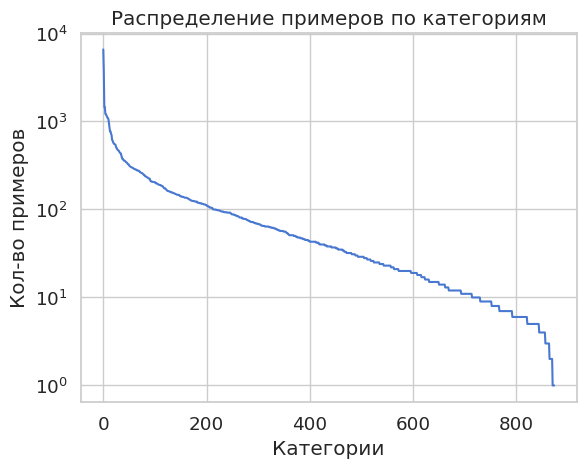

In [ ]:
target_encoder = LabelEncoder()
df["class"] = target_encoder.fit_transform(df["category_id"])

n_class = df["class"].nunique()
print("Категорий:", n_class)

cat_count = df["category_id"].value_counts()

plt.plot(cat_count.values)
plt.title("Распределение примеров по категориям")
plt.xlabel("Категории")
plt.ylabel("Кол-во примеров")
plt.yscale('log')
plt.show()

Категории сильно дисбалансированы

In [ ]:
cat_count[cat_count == 1]

12901    1
11549    1
11875    1
12836    1
Name: category_id, dtype: int64

4 категрии имеют по одному примеру. Для работы функции стратификации при делении данных на train и val эти данные далее продублирую (думаю не сильно загрязню данные учитывая что всего 90к примеров)

In [ ]:
# для будущей стратификации добавил примеры
one_example = df[df['category_id'].isin(cat_count[cat_count == 1].index)]
df_ = pd.concat([df, one_example])
df_.shape

(91124, 9)

## sale

In [ ]:
# Процентное соотношение
df['sale'].value_counts(normalize=True) * 100

False    98.656716
True      1.343284
Name: sale, dtype: float64

In [ ]:
# процентное отношение True к False в категории
sale_cat = df.groupby('category_id').apply(lambda df: len(df[df['sale']]) / (len(df))).sort_values(ascending=False)
print('Категорий с Sale:', len(sale_cat[sale_cat != 0]))
sale_cat[:10]

Категорий с Sale: 220


category_id
14553    0.285714
11823    0.285714
13241    0.250000
15050    0.222222
11913    0.166667
11942    0.166667
12517    0.143969
11708    0.142857
12384    0.142857
13776    0.142857
dtype: float64

`sale` сужает идентификацию категории с 874 до 220

## rating

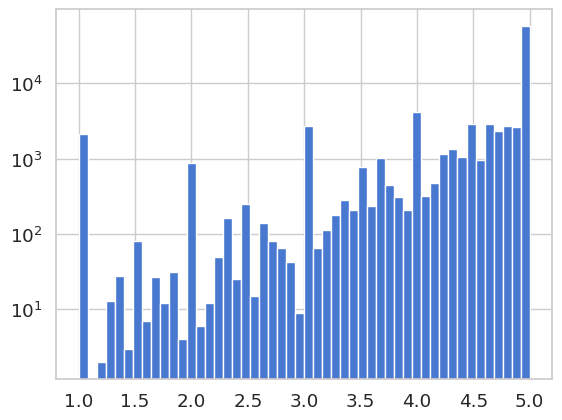

In [ ]:
df['rating'].hist(bins=50)
plt.yscale('log')

In [ ]:
df['rating_interval'] = pd.cut(df['rating'], np.arange(1, 5.1, .5), include_lowest=True)
df.groupby('rating_interval')['category_id'].agg(['nunique', 'count'])

,nunique,count
rating_interval,,
"(0.999, 1.5]",448,2247
"(1.5, 2.0]",305,952
"(2.0, 2.5]",199,508
"(2.5, 3.0]",540,3021
"(3.0, 3.5]",389,1568
"(3.5, 4.0]",687,6378
"(4.0, 4.5]",686,7265
"(4.5, 5.0]",869,69181


## shop_id и shop_title

In [ ]:
n_shop = df["shop_title"].nunique()
n_shop

10549

In [ ]:
len(df.groupby(['shop_title', 'shop_id']))

10549

`shop_id` и `shop_title` - представляют одну информацию

In [ ]:
cat_shop = df.groupby(['category_id'])['shop_title'].nunique()
shop_cat = df.groupby(['shop_title'])['category_id'].nunique()

print(f'Категории с 1 продавцом:: {len(cat_shop[cat_shop == 1])} из {n_class}', )
print(f'Продавцы с 1 категорией товаров: {len(shop_cat[shop_cat == 1])} из {n_shop}', )

Категории с 1 продавцом:: 7 из 874
Продавцы с 1 категорией товаров: 4371 из 10549


## text_fields

In [ ]:
t = df['text_fields'][0]
t

'{"title": "Зарядный кабель Borofone BX1 Lightning для айфон, 1м", "description": "<p><span style=\\"background-color: transparent; color: rgb(0, 26, 52);\\">Зарядный кабель Borofone BX1 подходит для зарядки всех гаджетов и аксессуаров с разъемом </span>Lightning.</p><p><span style=\\"color: rgb(0, 26, 52); background-color: transparent;\\">Поддерживает быструю зарядку.</span></p><p><span style=\\"color: rgb(0, 26, 52); background-color: transparent;\\">Подходит для передачи данных.</span></p>", "attributes": ["Длина: 1м", "Разъем: Lightning", "Подерживает быструю зарядку", "Максимальный ток: 2.0А", "Для зарядки и синхронизации данных", "Вес: 22 г."], "custom_characteristics": {}, "defined_characteristics": {"Цвет": ["Черный", "Белый"]}, "filters": {"Цвет": ["Белый", "Черный"]}}'

Текстовое поле представляет собой строку JSON. Его можно преобразовать в словарь для удобства
+ https://stackoverflow.com/questions/988228/convert-a-string-representation-of-a-dictionary-to-a-dictionary

In [ ]:
pprint.pprint(json.loads(t))

{'attributes': ['Длина: 1м',
                'Разъем: Lightning',
                'Подерживает быструю зарядку',
                'Максимальный ток: 2.0А',
                'Для зарядки и синхронизации данных',
                'Вес: 22 г.'],
 'custom_characteristics': {},
 'defined_characteristics': {'Цвет': ['Черный', 'Белый']},
 'description': '<p><span style="background-color: transparent; color: rgb(0, '
                '26, 52);">Зарядный кабель Borofone BX1 подходит для зарядки '
                'всех гаджетов и аксессуаров с разъемом '
                '</span>Lightning.</p><p><span style="color: rgb(0, 26, 52); '
                'background-color: transparent;">Поддерживает быструю '
                'зарядку.</span></p><p><span style="color: rgb(0, 26, 52); '
                'background-color: transparent;">Подходит для передачи '
                'данных.</span></p>',
 'filters': {'Цвет': ['Белый', 'Черный']},
 'title': 'Зарядный кабель Borofone BX1 Lightning для айфон, 1м'}


## Вывод

Табличные данные имеют потенциал для классификации категорий, однако сконцентрируюсь на текстовой информации

# Сплитование данных

In [ ]:
X = df_
y = df_["class"].values

df_train, df_val, y_train, y_val = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=RS, 
                                                    stratify=y,
                                                    )
del X, y, df

# Обработка текста

Текст извлекается из признаков:
+ `text_fields` из полей:
    + title
    + description
    + attributes
+ `shop_title`    

Предобработка:
+ удаление `html-тегов`
+ удаление символов `&xxxx;`
+ удаление `http-ссылок`
+ токенизация по кириллице и латинице
+ лемматизация
+ удаление стоп-слов

In [ ]:
class TextProcessor:
    UNK = "[UNK]"
    PAD = "[PAD]"

    def __init__(self):
        self.word2idx = {}
    
    def build_vocab(self, corpus: List[str], min_len: int, min_count: int, 
                    stopword: List[str]) -> None:
        # словарь
        vocab = Counter()
        for text in corpus:
            vocab.update(set(text.split()))

        # фильтрация
        if stopword is None:
            stopword = []

        vocab = {word: count for word, count in vocab.items() 
                 if len(word) >= min_len 
                 and count >= min_count 
                 and word not in stopword
                 }
                 
        # сортировка
        vocab = dict(sorted(list(vocab.items()), 
                            key=lambda x: x[1], 
                            reverse=True))

        # словарь индексов
        self.word2idx[self.PAD] = 0 
        self.word2idx[self.UNK] = 1
        wi = {w: i for i, w in enumerate(vocab, len(self.word2idx))}
        self.word2idx.update(wi)

    
    def text_preprocessing(self, text_fields: pd.Series, 
                           shop_title: pd.Series, lema: bool) -> List[str]:
        """
        Создаёт очищенный корпус текстов
        """ 
        assert len(text_fields) == len(shop_title), "Разная длина текстовых полей"

        corpus = [self._prpepare_shop_title(title) 
                  + self._prepare_text_field(text) 
                  for text, title in tqdm(zip(text_fields, shop_title), 
                                          desc='Токенизация', 
                                          total=len(shop_title))
        ]

        if lema:
            corpus = self._lemmatization(corpus)

        return list(map(" ".join, corpus))

    def _prpepare_shop_title(self, title: str) -> List[str]:
        title = title.lower()  
        return self._tokenize(title)  
    
    def _prepare_text_field(self, text_field: str) -> List[str]:
        text = json.loads(text_field)
        text = self._extract_text(text)
        text = text.lower()
        text = self._remove_tags(text)
        text = self._remove_urls(text)
        text = self._remove_spec_symbols(text)
        return self._tokenize(text)

    def _lemmatization(self, corpus: list) -> list:
        set_tokens = set()
        for tokens in corpus:
            set_tokens |= set(tokens)

        morph = pymorphy2.MorphAnalyzer()
        word_lema = {word: morph.parse(word)[0].normal_form 
                     for word in tqdm(set_tokens, desc='Лемматизация')} 

        corpus = [[word_lema.get(word) for word in tokens] 
                     for tokens in corpus]
        return corpus
    
    
    def _extract_text(self, text_fields: dict) -> str:
        text = [ text_fields["title"], 
                 text_fields["description"], 
                *text_fields["attributes"],
               ]
        return ' '.join(text)

    def _remove_tags(self, text: str) -> str:
        re_html = re.compile(r'<[^>]+>')
        return re_html.sub(' ', text)

    def _remove_spec_symbols(self, text: str) -> str:
        re_html = re.compile(r'&[^;\s]+;')
        return re_html.sub(' ', text)

    def _remove_urls(self, text: str) -> str:
        re_url = re.compile(r'https?:\S+')
        return re_url.sub(' ', text)

    def _tokenize(self, text: str) -> List[str]:
        pattern = re.compile(r"[а-яё]+|\b[a-z]+\b")
        return pattern.findall(text)
    
    def _encoding(self, corpus: list) -> list:
        """
        Кодирует слова индексами из словаря
        """
        corpus = [[self.word2idx.get(word, self.word2idx[self.UNK])
                  for word in text.split()] for text in corpus]
        return corpus
    
    def _padded(self, corpus: List[List[str]], text_size: int):
        """
        Создаёт векторы текста фиксированной длины с заполнением нулями, 
        если исходная длина меньше
        """
        matrix = np.zeros((len(corpus), text_size), dtype='int')

        for i, tokens in enumerate(corpus):
            if len(tokens) >= text_size:
                matrix[i] = tokens[:text_size]
            else:
                matrix[i, :len(tokens)] = tokens
        return matrix
    
    def vectorize(self, corpus: list, text_size: int) -> np.ndarray:
        corpus = self._encoding(corpus)
        matrix = self._padded(corpus, text_size)
        return matrix
    
    def filtering_corpus(self, corpus: list) -> list:
        corpus = [[word for word in text.split() if word in self.word2idx] 
                  for text in corpus]
        return list(map(" ".join, corpus))


In [ ]:
%%time

STOPWORDS = stopwords.words("russian")
TEXT_SIZE = 100
LEMA = False
MIN_COUNT = 2  # минимум примеров с токеном
MIN_LEN = 2  # минимальная длина токена

# Предобработка текста
tp = TextProcessor()

corpus_train = tp.text_preprocessing(df_train["text_fields"], 
                                     df_train["shop_title"],
                                     lema=LEMA)
corpus_val = tp.text_preprocessing(df_val["text_fields"], 
                                   df_val["shop_title"],
                                   lema=LEMA)
corpus_test = tp.text_preprocessing(df_test["text_fields"], 
                                    df_test["shop_title"],
                                    lema=LEMA)

# Построение словаря на данных TRAIN + VAL
tp.build_vocab(corpus_train + corpus_val, 
               min_count=MIN_COUNT, 
               min_len=MIN_LEN, 
               stopword=STOPWORDS)
print("\nРазмер словаря:", len(tp.word2idx))

# Удаляем токены, которых нет в словаре
corpus_train = tp.filtering_corpus(corpus_train)
corpus_val = tp.filtering_corpus(corpus_val)
corpus_test = tp.filtering_corpus(corpus_test)

# Векторизация текста (слова в числа)
text_vectors_train = tp.vectorize(corpus_train, TEXT_SIZE)
text_vectors_val = tp.vectorize(corpus_val, TEXT_SIZE)
text_vectors_test = tp.vectorize(corpus_test, TEXT_SIZE)

Токенизация:   0%|          | 0/72899 [00:00<?, ?it/s]

Токенизация:   0%|          | 0/18225 [00:00<?, ?it/s]

Токенизация:   0%|          | 0/16860 [00:00<?, ?it/s]


Размер словаря: 86421
CPU times: user 22.2 s, sys: 871 ms, total: 23 s
Wall time: 27.8 s


ru_words=76816, en_words=9602


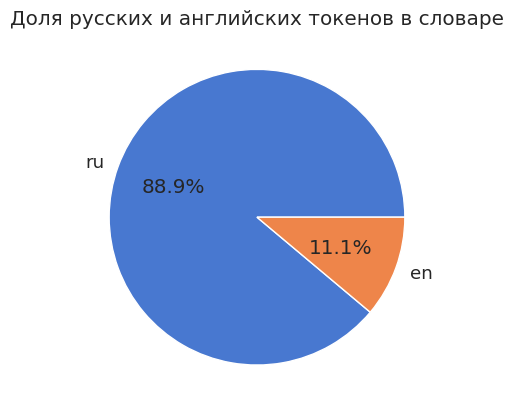

ТОП всех токенов
 ['см', 'материал', 'размер', 'цвет', 'мм', 'это', 'также', 'состав', 'позволяет', 'легко']
----------------------------------------------------------------------------------------------------
ТОП English токенов
 ['usb', 'iphone', 'pro', 'samsung', 'xiaomi', 'store', 'apple', 'bluetooth', 'shop', 'redmi']


In [ ]:
def fraction_ru_en_tokens(vocab):
    ru_words = en_words = 0

    for word in vocab:
        ru_words += bool(re.search('[а-я]+', word))
        en_words += bool(re.search('[a-z]+', word))
        
    print(f'{ru_words=}, {en_words=}')
    plt.pie([ru_words, en_words], labels=['ru', 'en'], autopct='%.1f%%')
    plt.title("Доля русских и английских токенов в словаре")
    plt.show()


fraction_ru_en_tokens(tp.word2idx)

print("ТОП всех токенов\n", list(tp.word2idx)[2:12])
print('-'*100)

en_tok = [k for k in tp.word2idx if bool(re.search('[a-z]+', k))][:10]
print("ТОП English токенов\n", en_tok)

In [ ]:
corpus_train[22]

'red clay сковородка тарелкой судок красной глины сли высоко цените посуду которая передает тепло особое настроение посуда красной глины материал имеет столь древнюю историю само человечество несмотря современную развитую технику технологию приготовления блюд готовка посуде глины сих пор остается очень актуальной это связано экологичностью той вкусовой ноткой которую приобретают блюда приготовленные посуде кроме посуда красной глины имеет особый оригинальный дизайн станет дополнительным украшением вашего стола помещения целом интересной посуды красной глины найти нашем магазине red clay общий вес кг объем сковородки высота сковородки см тарелки см сковородки см процесс производства молочение материал красная глина'

In [ ]:
text_vectors_train[22]

array([ 8536, 35317, 37457, 23076, 68873,  7956,  6495, 52038, 10655,
       23742,  2512,   143,  2918,   751,  4588,   386,   986,  7956,
        6495,     3,    19, 11998, 58756, 17725,  7008, 43171,  2564,
       15865, 68874,  4764,  5188,   664,  1223, 22461,  5312,  6495,
       19278,  6225,  1257,    15, 14869,     7,  8603, 16717,  7411,
       16716, 25185,   528,  9450,  2114, 16430,  5312,   561,   986,
        7956,  6495,    19,  4242,   416,    64,    88,  7363,   836,
          27,   766,  1744,  6954,  8771,   543,  7956,  6495,   261,
          42,    31,  8536, 35317,  3293,    24,   330,   150, 13249,
          50, 13249,     2,  4319,     2, 13249,     2,   698,   352,
       52037,     3,  3292,  7364,     0,     0,     0,     0,     0,
           0])

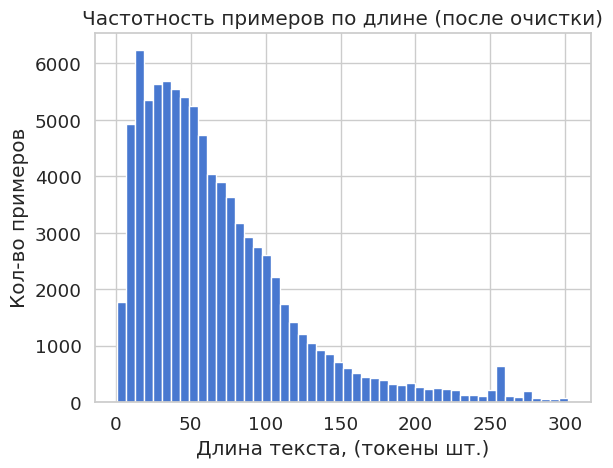

In [ ]:
# Количество токенов в одном примере
# Длины понадобятся в LSTM

def get_lenght(corpus):
    return list(map(lambda x: len(x.split()), corpus))

lenght_train = get_lenght(corpus_train)
lenght_val = get_lenght(corpus_val)
lenght = pd.Series(lenght_train + lenght_val)

plt.hist(lenght[lenght < lenght.quantile(.99)], bins=50)
plt.title('Частотность примеров по длине (после очистки)')
plt.ylabel('Кол-во примеров')
plt.xlabel('Длина текста, (токены шт.)');

График помогает определить диапазон для фиксированной длины текста `TEXT_SIZE`

In [ ]:
lenght.describe()

count    91124.000000
mean        71.384860
std         65.669296
min          1.000000
25%         30.000000
50%         55.000000
75%         92.000000
max       2401.000000
dtype: float64

Аномалии:
+ 38525 - текста нет

# Бейзлайн

+ векторизатор `TfidfVectorizer`
+ модель `ComplementNB`
    + для несбалансированных классов
    + быстро считает

In [ ]:
%%time

vectorizer = TfidfVectorizer(min_df=5, max_df=0.5)
vectorizer.fit(corpus_train + corpus_val)

X_tfidf_train = vectorizer.transform(corpus_train)
X_tfidf_val = vectorizer.transform(corpus_val)

baseline = ComplementNB(alpha=0.1)
baseline.fit(X_tfidf_train, y_train)

f1_val = f1_score(y_val, baseline.predict(X_tfidf_val), average='weighted')
f1_train = f1_score(y_train, baseline.predict(X_tfidf_train), average='weighted')

del vectorizer, X_tfidf_train, X_tfidf_val, baseline

CPU times: user 25.8 s, sys: 3.32 s, total: 29.1 s
Wall time: 37.5 s


In [ ]:
def add_model(path, name, train, val):
    try:
        df = pd.read_csv(path, index_col=0)
    except FileNotFoundError:
        df = pd.DataFrame()
        
    result = pd.DataFrame({"Model": [name], 
                           "f1_train": [train], 
                           "f1_val": [val]})
    results = pd.concat([df, result], ignore_index=True).drop_duplicates()
    results.to_csv(path)
    return results

In [ ]:
path_scores = "scores.csv"
results = add_model(path_scores, "Baseline", f1_train, f1_val)
results 

,Model,f1_train,f1_val
0,Baseline,0.782432,0.697255


# Нейросеть для текста
+ Эмбеддинг
+ Полносвязные слои

## Датасет

In [ ]:
class Text_Dataset(Dataset):
    def __init__(self, texts, targets, length=None):
        """
        length - кол-во токенов (для LSTM)
        """
        self.targets = targets
        self.texts = texts
        self.length = length

    def __len__(self):
        return len(self.targets)
    
    def __getitem__(self, idx):  
        batch = {'text': self.texts[idx],
                 'target': self.targets[idx]}
        if self.length is not None:
            batch['length'] = self.length[idx]
        return batch

In [ ]:
batch_size = 64

train_dataset = Text_Dataset(texts=torch.from_numpy(text_vectors_train), 
                             targets=torch.from_numpy(y_train))
val_dataset = Text_Dataset(texts=torch.from_numpy(text_vectors_val), 
                           targets=torch.from_numpy(y_val))

loaders = {"train": DataLoader(train_dataset, batch_size=batch_size, shuffle=True, 
                               num_workers=2, pin_memory=True), 
           "val": DataLoader(val_dataset, batch_size=batch_size, shuffle=False, 
                             num_workers=2, pin_memory=True)
           }

In [ ]:
b = next(iter(loaders['train']))
b['text'].shape, b['target'].shape

(torch.Size([64, 100]), torch.Size([64]))

## Цикл обучения

In [ ]:
def f1_score_weighted(preds, labels):
    return f1_score(labels.cpu(), preds.cpu().argmax(dim=1), average='weighted')


def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(16, 5))
    x = np.arange(1, len(history["loss_train"])+1)

    for i, key in enumerate(['f1', 'loss']):
        for mode in ['train', 'val']:
            ax[i].plot(x, history[f"{key}_{mode}"], label=mode)

        ax[i].set_title(key.title())
        ax[i].set_xticks(x)
        ax[i].set_xlabel('Эпоха')
        ax[i].legend()
        # ax[i].grid()
    # plt.savefig('/kaggle/working/learning.png') 


def params_count(model):
    p_count = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Тренеруемых параметров: {p_count:,}")     


def trainval(model, loaders, optimizer, loss_func, metric_func, 
             scheduler, epochs, device):
    history = {"loss_train": [], "loss_val": [], 
               "f1_train": [], "f1_val": []} 
    try:
        for epoch in range(epochs): 
            for mode in ['train', 'val']:
                epoch_score, epoch_loss = 0, 0

                with torch.set_grad_enabled(mode == 'train'):
                    model.train() if mode == 'train' else model.eval()

                    for batch in tqdm(loaders[mode]):
                        batch = {k: v.to(device) for k, v in batch.items()}
                        labels = batch.pop('target')

                        preds = model(**batch)
                        loss = loss_func(preds, labels)
                        score = metric_func(preds, labels)

                        epoch_score += score
                        epoch_loss += loss.item()

                        if mode == 'train':
                            optimizer.zero_grad()
                            loss.backward()
                            optimizer.step() 
                            scheduler.step()  

                loss_mean = epoch_loss / len(loaders[mode])
                score_mean = epoch_score / len(loaders[mode])
                history[f"loss_{mode}"].append(loss_mean)
                history[f"f1_{mode}"].append(score_mean)  

                print(f"[{mode}] Epoch: {epoch+1}/{epochs} "
                        f"Loss: {loss_mean:.4f} "
                        f"Score: {score_mean:.4f} ")
                
            print(f"LR: {scheduler.get_last_lr()[0]:.9f}") 
            # scheduler.step()  

    except KeyboardInterrupt:
        print('Прервано обучение')
    except Exception as e:
        print(e)
    finally:
        return history      

In [ ]:
gc.collect()

6274

## MLP

In [ ]:
class MLP_text(torch.nn.Module) :
    def __init__(self, vocab_size, embedding_dim, n_class, text_size, hidden_dim):
        super().__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        nn.init.kaiming_uniform_(self.embeddings.weight, nonlinearity='relu')
        
        self.fc1 = nn.Linear(in_features=embedding_dim * text_size, out_features=hidden_dim)
        self.fc2 = nn.Linear(in_features=hidden_dim, out_features=hidden_dim)
        self.fc3 = nn.Linear(in_features=hidden_dim, out_features=n_class)
        self.dropout = nn.Dropout(0.3)
        
    def forward(self, text):
        x = self.embeddings(text)
        x = self.dropout(x)
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

In [ ]:
EMBEDDING_DIM = 200
hidden_dim = 512
lr = 0.002
epochs = 5

model = MLP_text(vocab_size=len(tp.word2idx),
                 embedding_dim=EMBEDDING_DIM, 
                 n_class=n_class,
                 text_size=TEXT_SIZE,
                 hidden_dim=hidden_dim
                 )
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), 
                              lr=lr,
                              weight_decay=1e-4)

# scheduler = PolynomialLR(optimizer, 
#                         #  total_iters=len(loaders['train']) * epochs,
#                         #  total_iters=epochs,
#                          power=2) 

scheduler = get_linear_schedule_with_warmup(
                optimizer,
                num_warmup_steps=50,
                num_training_steps=len(loaders['train']) * epochs
)
params_count(model)

Тренеруемых параметров: 28,235,730


In [ ]:
%%time

history = trainval(model=model, 
                   loaders=loaders, 
                   optimizer=optimizer, 
                   loss_func=criterion, 
                   metric_func=f1_score_weighted,
                   epochs=epochs,
                   scheduler=scheduler,
                   device=device)

  0%|          | 0/1140 [00:00<?, ?it/s]

[train] Epoch: 1/5 Loss: 2.7176 Score: 0.4681 


  0%|          | 0/285 [00:00<?, ?it/s]

[val] Epoch: 1/5 Loss: 1.1789 Score: 0.7272 
LR: 0.001614159


  0%|          | 0/1140 [00:00<?, ?it/s]

[train] Epoch: 2/5 Loss: 0.9944 Score: 0.7580 


  0%|          | 0/285 [00:00<?, ?it/s]

[val] Epoch: 2/5 Loss: 0.8351 Score: 0.8032 
LR: 0.001210619


  0%|          | 0/1140 [00:00<?, ?it/s]

[train] Epoch: 3/5 Loss: 0.5389 Score: 0.8541 


  0%|          | 0/285 [00:00<?, ?it/s]

[val] Epoch: 3/5 Loss: 0.7564 Score: 0.8228 
LR: 0.000807080


  0%|          | 0/1140 [00:00<?, ?it/s]

[train] Epoch: 4/5 Loss: 0.3145 Score: 0.9110 


  0%|          | 0/285 [00:00<?, ?it/s]

[val] Epoch: 4/5 Loss: 0.7151 Score: 0.8401 
LR: 0.000403540


  0%|          | 0/1140 [00:00<?, ?it/s]

[train] Epoch: 5/5 Loss: 0.1930 Score: 0.9438 


  0%|          | 0/285 [00:00<?, ?it/s]

[val] Epoch: 5/5 Loss: 0.7058 Score: 0.8466 
LR: 0.000000000
CPU times: user 1min 32s, sys: 5.34 s, total: 1min 37s
Wall time: 1min 48s


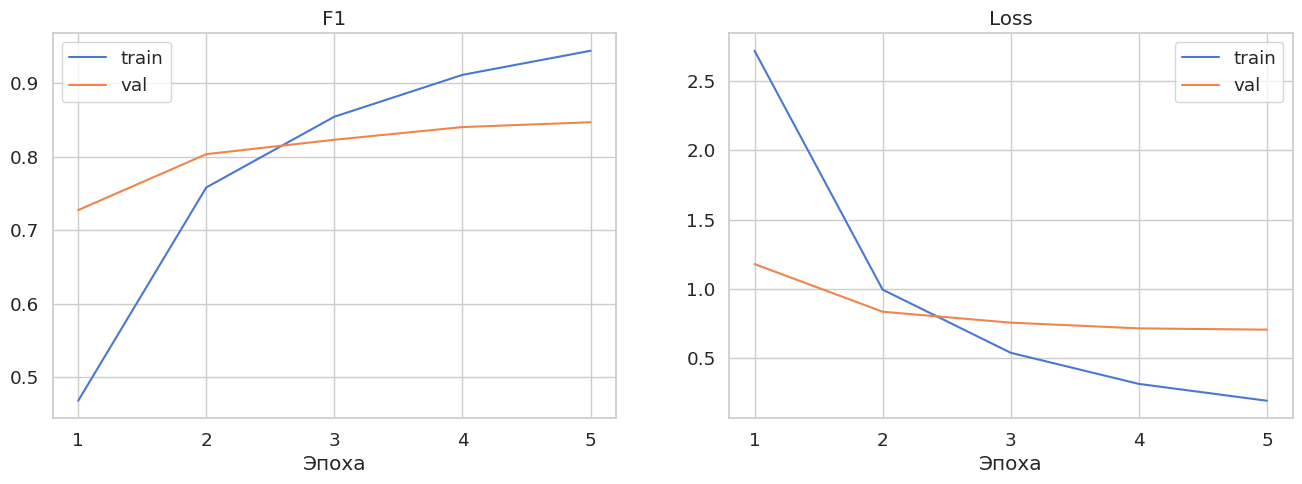

In [ ]:
plot_history(history)

На 3 эпохе начинается переобучение, ограничим тренировку модели этой эпохой

In [ ]:
results = add_model(path_scores, 
                    "MLP-Text", 
                    history['f1_train'][-1], 
                    history['f1_val'][-1])
results

,Model,f1_train,f1_val
0,Baseline,0.782432,0.697255
1,MLP-Text,0.943761,0.846599


In [ ]:
text_model = 'model-text.ann'
torch.save(model.state_dict(), text_model)

### Предсказание

In [ ]:
def prediction(model, test_text, device, target_encoder):
    model.eval()
    preds = model(test_text.to(device))

    preds_ser = pd.Series(preds.cpu().argmax(1).numpy(), 
                          name='predicted_category_id')
    df_pred = df_test[['product_id']].join(preds_ser)
    df_pred['predicted_category_id'] = target_encoder.inverse_transform(df_pred['predicted_category_id'])
    df_pred.to_parquet("result.parquet")
    return df_pred

In [ ]:
%%time

df_pred = prediction(model=model, 
                     test_text=torch.from_numpy(text_vectors_test), 
                     device=device, 
                     target_encoder=target_encoder)

df_pred.head()

CPU times: user 219 ms, sys: 35.6 ms, total: 255 ms
Wall time: 298 ms


,product_id,predicted_category_id
0,1997646,12928
1,927375,14922
2,1921513,2803
3,1668662,12524
4,1467778,12524


In [ ]:
df_class = df_[['category_id', 'category_name']].drop_duplicates() 

df_merged = (df_test[['product_id', 'text_fields']]
             .merge(df_pred)
             .merge(df_class, 
                    how='left', 
                    left_on='predicted_category_id',
                    right_on='category_id')
            )
df_merged.head()

,product_id,text_fields,predicted_category_id,category_id,category_name
0,1997646,"{""title"": ""Светодиодная лента Smart led Strip ...",12928,12928,Все категории->Электроника->Наушники и аудиоте...
1,927375,"{""title"": ""Стекло ПЛЕНКА керамик матовое Honor...",14922,14922,Все категории->Электроника->Смартфоны и телефо...
2,1921513,"{""title"": ""Проводные наушники с микрофоном jac...",2803,2803,Все категории->Электроника->Наушники и аудиоте...
3,1668662,"{""title"": ""Декоративная табличка \""Правила кух...",12524,12524,Все категории->Товары для дома->Товары для кух...
4,1467778,"{""title"": ""Подставка под ложку керамическая, п...",12524,12524,Все категории->Товары для дома->Товары для кух...


In [ ]:
def click(b):
    output.clear_output()
    global i, img_dir_test, df_merged

    with output:
        print_result(i, img_dir_test, df_merged)

        
def clicked_next(b):
    global i
    click(b)
    i += 1  
    
    
def clicked_prev(b):
    global i
    click(b)
    i -= 1  
    
    
def print_result(i, img_dir_test, df):
    ser = df.iloc[i]
    img_path = img_dir_test + str(ser['product_id']) + '.jpg'

    print('Предсказанная категория:')
    print(ser['category_name'])
    print('-' * 100)
    print('Описание:')

    plt.figure()
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    pprint.pprint(json.loads(ser["text_fields"]))
    

In [ ]:
i = 13000
img_dir_test = '/content/images/test/'

button_nxt = widgets.Button(description="+1")
button_prev = widgets.Button(description="-1")
output = widgets.Output()

display(button_nxt, button_prev, output)

button_nxt.on_click(clicked_next)
button_prev.on_click(clicked_prev)

Button(description='+1', style=ButtonStyle())

Button(description='-1', style=ButtonStyle())

Output()

## CNN

+ Входной канал в свертку - размерность эмбеддинга
+ Выходной канал - кол-во фильтров
+ Оптимизируются веса фильтров

Ссылки
+ https://sumanshuarora.medium.com/understanding-pytorch-conv1d-shapes-for-text-classification-c1e1857f8533
+ https://colab.research.google.com/drive/1b7aZamr065WPuLpq9C4RU6irB59gbX_K#scrollTo=ejGLw8TKViBY

In [ ]:
class CNN_text(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_class, text_size, 
                 n_filters, filter_sizes) :
        super().__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        nn.init.kaiming_uniform_(self.embeddings.weight, nonlinearity='relu')
        
        self.convs = nn.ModuleList([nn.Conv1d(in_channels=embedding_dim,
                                              out_channels=n_filters,
                                              kernel_size=fs)
                                    for fs in filter_sizes])

        self.flatten = nn.Flatten()
        self.dropout = nn.Dropout(0.3)
        self.fc1 = nn.Linear(len(filter_sizes) * n_filters, 512)  
        self.fc2 = nn.Linear(512, n_class)  

    def forward(self, text):
        # size (batch, text_size, embedding_dim)
        emb = self.embeddings(text) 
        # size (batch, embedding_dim, text_size)
        emb = emb.transpose(1, 2)  # меняет местами оси
        
        # Одна свёртка: size  (batch, num_filters, L_out)
        x_convs = [F.relu( conv(emb) ) for conv in self.convs] 

        # Одна свёртка: size  (batch, num_filters, 1)
        x_pools = [F.max_pool1d(x_conv, kernel_size=x_conv.shape[2])
                  for x_conv in x_convs]
        
        cat = torch.cat(x_pools, dim=2)  

        x = self.flatten(cat)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)  
        return x

In [ ]:
N_FILTERS = 128
FILTER_SIZES = [2, 4, 6]
lr = 0.002

model = CNN_text(vocab_size=len(tp.word2idx),
                     embedding_dim=EMBEDDING_DIM, 
                     n_class=n_class,
                     text_size=TEXT_SIZE,
                     n_filters=N_FILTERS, 
                     filter_sizes=FILTER_SIZES, 
                     )
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), 
                             lr=lr, 
                             weight_decay=1e-4)

scheduler = get_linear_schedule_with_warmup(
                optimizer,
                num_warmup_steps=50,
                num_training_steps=len(loaders['train']) * epochs
)
# scheduler = PolynomialLR(optimizer, 
#                          total_iters=len(loaders['train']) * epochs,
#                         #  total_iters=epochs,
#                          power=2) 
params_count(model)

Тренеруемых параметров: 18,237,266


In [ ]:
%%time

history = trainval(model=model, 
                   loaders=loaders, 
                   optimizer=optimizer, 
                   loss_func=criterion, 
                   metric_func=f1_score_weighted,
                   epochs=epochs,
                   scheduler=scheduler,
                   device=device)

  0%|          | 0/1140 [00:00<?, ?it/s]

[train] Epoch: 1/5 Loss: 2.5001 Score: 0.5113 


  0%|          | 0/285 [00:00<?, ?it/s]

[val] Epoch: 1/5 Loss: 1.0678 Score: 0.7507 
LR: 0.001614159


  0%|          | 0/1140 [00:00<?, ?it/s]

[train] Epoch: 2/5 Loss: 0.8732 Score: 0.7866 


  0%|          | 0/285 [00:00<?, ?it/s]

[val] Epoch: 2/5 Loss: 0.7416 Score: 0.8121 
LR: 0.001210619


  0%|          | 0/1140 [00:00<?, ?it/s]

[train] Epoch: 3/5 Loss: 0.5380 Score: 0.8555 


  0%|          | 0/285 [00:00<?, ?it/s]

[val] Epoch: 3/5 Loss: 0.6613 Score: 0.8367 
LR: 0.000807080


  0%|          | 0/1140 [00:00<?, ?it/s]

[train] Epoch: 4/5 Loss: 0.3458 Score: 0.9006 


  0%|          | 0/285 [00:00<?, ?it/s]

[val] Epoch: 4/5 Loss: 0.6272 Score: 0.8496 
LR: 0.000403540


  0%|          | 0/1140 [00:00<?, ?it/s]

[train] Epoch: 5/5 Loss: 0.2114 Score: 0.9411 


  0%|          | 0/285 [00:00<?, ?it/s]

[val] Epoch: 5/5 Loss: 0.6233 Score: 0.8564 
LR: 0.000000000
CPU times: user 1min 38s, sys: 5.77 s, total: 1min 44s
Wall time: 2min 2s


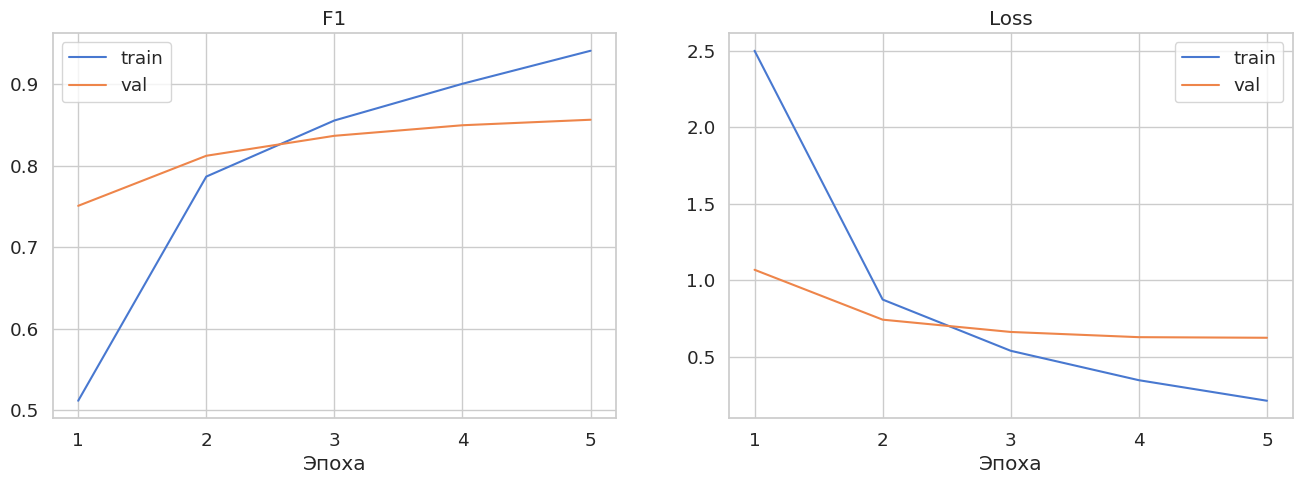

In [ ]:
plot_history(history)

In [ ]:
results = add_model(path_scores, 
                    "CNN-Text", 
                    history['f1_train'][-1], 
                    history['f1_val'][-1])
results 

,Model,f1_train,f1_val
0,Baseline,0.782432,0.697255
1,MLP-Text,0.943761,0.846599
2,CNN-Text,0.941109,0.856393


## LSTM
+ Входная размерность в LSTM - размер эмбеддинга
+ Если применять `pack_padded_sequence`, то:
    - Длину текстов переместить на cpu
    - Проверить, что длина не равна 0 и не превышает максимальную длину текста


**Инсайт (ЭТО ОДНО И ТОЖЕ!)**

https://stackoverflow.com/questions/48302810/whats-the-difference-between-hidden-and-output-in-pytorch-lstm

        lstm_out, (ht, ct) = self.lstm(x)

- `bidirectional=False`
    + `lstm_out[:, -1, :]` - выход последнего элемента последовательности размером (batch, lstm_units)
    + `ht[-1, :, :]` or `ht[-1]` - финальное скрытое состояние (после последнего элемента последовательности размером (batch, lstm_units)
            lstm_out[:, -1, :] == ht[-1]

- `bidirectional=True`
        out_forward = lstm_out[:, -1, :lstm_units]
        out_reverse = lstm_out[:, 0, lstm_units:]

        out_forward == ht[-2]
        out_reverse == ht[-1]

        final_out = torch.cat((ht[-2], ht[-1]), dim=1)


In [ ]:
class LSTM_text(nn.Module) :
    def __init__(self, vocab_size, embedding_dim, lstm_units, n_class, 
                 bidirectional, num_layers) :
        super().__init__()
        self.embeddings = nn.Embedding(vocab_size, 
                                       embedding_dim, 
                                       padding_idx=0)
        nn.init.kaiming_uniform_(self.embeddings.weight, nonlinearity='relu')

        self.dropout = nn.Dropout(0.2)
        self.lstm = nn.LSTM(input_size=embedding_dim, 
                            hidden_size=lstm_units, 
                            num_layers=num_layers,  
                            bidirectional=bidirectional,
                            batch_first=True, 
                            )
        
        self.dim = 2 if bidirectional else 1
        self.linear = nn.Linear(lstm_units * self.dim, n_class)
        
    def forward(self, text, length):
        x = self.embeddings(text)
        x = self.dropout(x)
        x_pack = pack_padded_sequence(x, 
                                      length.cpu(), 
                                      batch_first=True, 
                                      enforce_sorted=False,
                                      )
        lstm_out, (ht, ct) = self.lstm(x_pack)

        if self.dim == 1:
            out = ht[-1]
        else:
            out = torch.cat((ht[-2], ht[-1]), dim=1)    

        return self.linear(out)

In [ ]:
BIDIRECTIONAL = True
LSTM_UNITS = 128
NUM_LAYERS = 1
lr = 0.02

model = LSTM_text(vocab_size=len(tp.word2idx),
                       embedding_dim=EMBEDDING_DIM, 
                       n_class=n_class,
                       lstm_units=LSTM_UNITS,
                       bidirectional=BIDIRECTIONAL,
                       num_layers=NUM_LAYERS,
                       )
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), 
                             lr=lr,
                             weight_decay=1e-4)

scheduler = get_linear_schedule_with_warmup(
                optimizer,
                num_warmup_steps=50,
                num_training_steps=len(loaders['train']) * epochs
)
params_count(model)

Тренеруемых параметров: 17,846,738


In [ ]:
batch_size = 64

# Добавим в датасет длину текстов, обрезав по максимальной длине.
# Минимальная длина=1, для избежания ошибок, если будет длина=0
len_train = pd.Series(lenght_train).clip(lower=1, upper=TEXT_SIZE).values
len_val = pd.Series(lenght_val).clip(lower=1, upper=TEXT_SIZE).values

train_dataset = Text_Dataset(texts=torch.from_numpy(text_vectors_train), 
                                  targets=torch.from_numpy(y_train), 
                                  length=torch.from_numpy(len_train))
val_dataset = Text_Dataset(texts=torch.from_numpy(text_vectors_val), 
                                targets=torch.from_numpy(y_val), 
                                length=torch.from_numpy(len_val))

loaders = {"train": DataLoader(train_dataset, batch_size=batch_size, 
                               shuffle=True, num_workers=2, pin_memory=True), 
           "val": DataLoader(val_dataset, batch_size=batch_size, 
                             shuffle=False, num_workers=2, pin_memory=True)
               }

In [ ]:
%%time

history = trainval(model=model, 
                   loaders=loaders, 
                   optimizer=optimizer, 
                   loss_func=criterion, 
                   metric_func=f1_score_weighted,
                   epochs=epochs,
                   scheduler=scheduler,
                   device=device)

  0%|          | 0/1140 [00:00<?, ?it/s]

[train] Epoch: 1/5 Loss: 2.1328 Score: 0.5831 


  0%|          | 0/285 [00:00<?, ?it/s]

[val] Epoch: 1/5 Loss: 1.2325 Score: 0.7163 
LR: 0.016141593


  0%|          | 0/1140 [00:00<?, ?it/s]

[train] Epoch: 2/5 Loss: 1.0943 Score: 0.7477 


  0%|          | 0/285 [00:00<?, ?it/s]

[val] Epoch: 2/5 Loss: 0.9839 Score: 0.7681 
LR: 0.012106195


  0%|          | 0/1140 [00:00<?, ?it/s]

[train] Epoch: 3/5 Loss: 0.9001 Score: 0.7859 


  0%|          | 0/285 [00:00<?, ?it/s]

[val] Epoch: 3/5 Loss: 0.8179 Score: 0.7998 
LR: 0.008070796


  0%|          | 0/1140 [00:00<?, ?it/s]

[train] Epoch: 4/5 Loss: 0.7158 Score: 0.8215 


  0%|          | 0/285 [00:00<?, ?it/s]

[val] Epoch: 4/5 Loss: 0.6660 Score: 0.8348 
LR: 0.004035398


  0%|          | 0/1140 [00:00<?, ?it/s]

[train] Epoch: 5/5 Loss: 0.4884 Score: 0.8715 


  0%|          | 0/285 [00:00<?, ?it/s]

[val] Epoch: 5/5 Loss: 0.5286 Score: 0.8665 
LR: 0.000000000
CPU times: user 2min 18s, sys: 6.33 s, total: 2min 24s
Wall time: 3min 18s


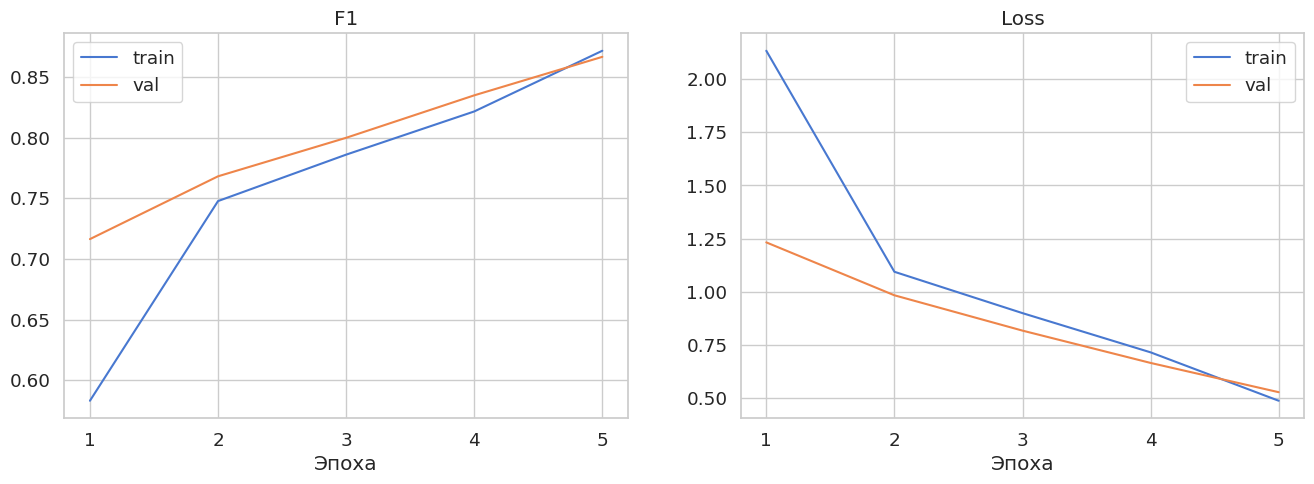

In [ ]:
plot_history(history)

In [ ]:
results = add_model(path_scores, 
                    "LSTM-Text", 
                    history['f1_train'][-1], 
                    history['f1_val'][-1])
results 

,Model,f1_train,f1_val
0,Baseline,0.782432,0.697255
1,MLP-Text,0.943761,0.846599
2,CNN-Text,0.941109,0.856393
3,LSTM-Text,0.871524,0.866506


## BERT

+ BERT использует токенизатор подслов (WordPiece), поэтому максимальная длина соответствует 512 токенам подслов.
+ BERT возвращает:
    - `last_hidden_state`
    - `pooler_output`
    - опционально еще параметры...

In [ ]:
bert_name = "cointegrated/rubert-tiny2"

bert_tokenizer = BertTokenizer.from_pretrained(bert_name)
bert = BertModel.from_pretrained(bert_name)
bert_config = BertConfig.from_pretrained(bert_name)

Some weights of the model checkpoint at cointegrated/rubert-tiny2 were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Размерность энкодера: 312
Размер словаря: 83828
ru_words=62171, en_words=17586


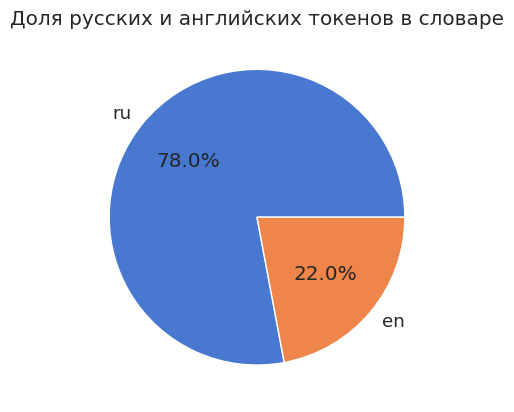

In [ ]:
print(f"Размерность энкодера: {bert_config.hidden_size}")
print(f"Размер словаря: {bert_config.vocab_size}")

fraction_ru_en_tokens(bert_tokenizer.vocab)

Лучше один раз токенезировать текст, чем в Dataset вызывать каждый раз в каждой итерации

In [ ]:
# def bert_tokenize(corpus, tokenizer):
#     bert_tokens = [tokenizer(text, 
#                              padding='max_length', 
#                              truncation=True,
#                              max_length=300, 
#                              return_tensors='pt',
#                              return_token_type_ids=False
#                              ) 
#                    for text in tqdm(corpus)]
#     return bert_tokens   
       

In [ ]:
# %%time

# bert_tokens_train = bert_tokenize(corpus_train, tokenizer=bert_tokenizer)
# bert_tokens_val = bert_tokenize(corpus_val, tokenizer=bert_tokenizer)

In [ ]:
class BERT_Dataset(Dataset):
    def __init__(self, corpus, targets, tokenizer):
        self.targets = targets
        self.texts = [tokenizer(text, 
                                padding='max_length', 
                                truncation=True,
                                max_length=300, 
                                return_tensors='pt',
                                return_token_type_ids=False
                               ) 
                      for text in tqdm(corpus)]

    def __len__(self):
        return len(self.targets)
    
    def __getitem__(self, idx):
        target = self.targets[idx]
        txt = self.texts[idx]
        
        return {'input_ids': txt['input_ids'].squeeze(),
                'attention_mask': txt['attention_mask'].squeeze(),
                'target': target}

In [ ]:
%%time

batch_size = 64

train_dataset = BERT_Dataset(corpus_train, y_train, tokenizer=bert_tokenizer)
val_dataset = BERT_Dataset(corpus_val, y_val, tokenizer=bert_tokenizer)

loaders = {"train": DataLoader(train_dataset, batch_size=batch_size, shuffle=True, 
                               num_workers=2, pin_memory=True), 
           "val": DataLoader(val_dataset, batch_size=batch_size, shuffle=False, 
                             num_workers=2, pin_memory=True)
           }

  0%|          | 0/72899 [00:00<?, ?it/s]

  0%|          | 0/18225 [00:00<?, ?it/s]

CPU times: user 3min 24s, sys: 3.08 s, total: 3min 27s
Wall time: 3min 59s


In [ ]:
%%time
b = next(iter(loaders['train']))
b['input_ids'].shape

CPU times: user 18.5 ms, sys: 134 ms, total: 153 ms
Wall time: 264 ms


torch.Size([64, 300])

In [ ]:
class BERT_MLP(torch.nn.Module):
    def __init__(self, n_class, bert, encoder_dim):
        super().__init__()
        self.bert = bert
        self.dropout = nn.Dropout(0.3)
        self.linear = nn.Linear(in_features=encoder_dim, out_features=n_class)
        
    def forward(self, input_ids, attention_mask):
        x = self.bert(input_ids=input_ids, 
                      attention_mask=attention_mask)
        # первый токен [CLS] (эмбеддинг всего текста)
        x = x.last_hidden_state[:, 0, :]  
        x = self.dropout(x)
        x = self.linear(x)
        return x

In [ ]:
epochs = 5
ENCODER_DIM = bert_config.hidden_size  # 312

bert_model = BERT_MLP(n_class=n_class,
                      bert=bert, 
                      encoder_dim=ENCODER_DIM
                     )
bert_model.to(device)
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.AdamW([
        {"params": bert_model.bert.parameters(), "lr": 3.5e-5},
        {"params": bert_model.linear.parameters()},
    ], 
    lr=0.001, 
#     weight_decay=1e-4
)

scheduler = get_linear_schedule_with_warmup(
                optimizer,
                num_warmup_steps=50,
                num_training_steps=len(loaders['train']) * epochs
)

In [ ]:
%%time

history = trainval(model=bert_model, 
                   loaders=loaders, 
                   optimizer=optimizer, 
                   loss_func=criterion, 
                   metric_func=f1_score_weighted,
                   epochs=epochs,
                   scheduler=scheduler,
                   device=device)

  0%|          | 0/1140 [00:00<?, ?it/s]

[train] Epoch: 1/5 Loss: 1.8032 Score: 0.6420 


  0%|          | 0/285 [00:00<?, ?it/s]

[val] Epoch: 1/5 Loss: 0.6591 Score: 0.8301 
LR: 0.000028248


  0%|          | 0/1140 [00:00<?, ?it/s]

[train] Epoch: 2/5 Loss: 0.6282 Score: 0.8384 


  0%|          | 0/285 [00:00<?, ?it/s]

[val] Epoch: 2/5 Loss: 0.5207 Score: 0.8578 
LR: 0.000021186


  0%|          | 0/1140 [00:00<?, ?it/s]

[train] Epoch: 3/5 Loss: 0.4748 Score: 0.8691 


  0%|          | 0/285 [00:00<?, ?it/s]

[val] Epoch: 3/5 Loss: 0.4830 Score: 0.8687 
LR: 0.000014124


  0%|          | 0/1140 [00:00<?, ?it/s]

[train] Epoch: 4/5 Loss: 0.3973 Score: 0.8876 


  0%|          | 0/285 [00:00<?, ?it/s]

[val] Epoch: 4/5 Loss: 0.4618 Score: 0.8760 
LR: 0.000007062


  0%|          | 0/1140 [00:00<?, ?it/s]

[train] Epoch: 5/5 Loss: 0.3507 Score: 0.8984 


  0%|          | 0/285 [00:00<?, ?it/s]

[val] Epoch: 5/5 Loss: 0.4551 Score: 0.8777 
LR: 0.000000000
CPU times: user 21min 40s, sys: 12.9 s, total: 21min 53s
Wall time: 22min 39s


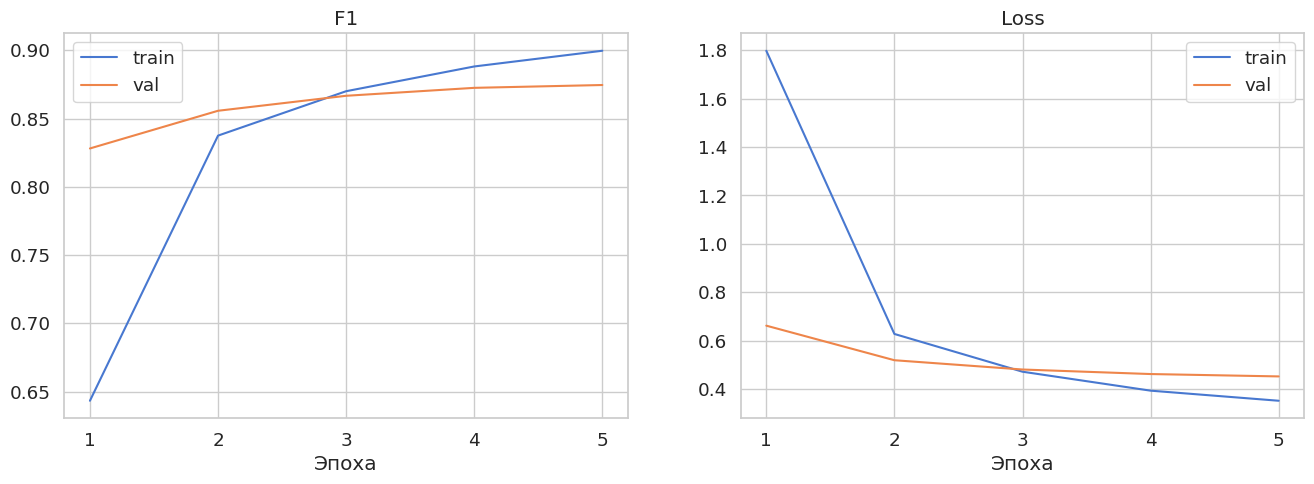

In [ ]:
plot_history(history)

In [ ]:
results = add_model(path_scores, 
                    "BERT-Text", 
                    history['f1_train'][-1], 
                    history['f1_val'][-1])
results 

,Model,f1_train,f1_val
0,Baseline,0.782432,0.697255
1,MLP-Text,0.943761,0.846599
2,CNN-Text,0.941109,0.856393
3,LSTM-Text,0.871524,0.866506
4,BERT-Text,0.899672,0.874571


# Конец финального решения!
# Дополнительные эксперименты

# Нейросеть для картинок

## Датасет

In [ ]:
class ImageDataset(Dataset):
    def __init__(self, label, img_dir, product_id, transform=None):
        self.label = label
        self.img_path = product_id.apply(lambda x: img_dir + str(x) + '.jpg')
        self.transform = transform
        
    def __len__(self):
        return len(self.label)
    
    def __getitem__(self, idx):
        image = read_image(self.img_path.iloc[idx])
        label = self.label[idx]

        if self.transform:
            image = self.transform(image)
            
        return {"image": image, 
                "target": label}

In [ ]:
transform_imgs = {
    "train": T.Compose([
            #  T.RandomRotation(30),
             T.RandomHorizontalFlip(.5),
             T.RandomVerticalFlip(.5),
             T.Resize(256), 
             T.CenterCrop(224),
             T.ConvertImageDtype(torch.float), 
             T.Normalize(
                mean=[0.485, 0.456, 0.406], 
                std=[0.229, 0.224, 0.225]
                )
             ]), 
    "val": T.Compose([
           T.Resize(256), 
           T.CenterCrop(224),
           T.ConvertImageDtype(torch.float), 
           T.Normalize(
                mean=[0.485, 0.456, 0.406], 
                std=[0.229, 0.224, 0.225]
                )
           ])
    }

In [ ]:
batch_size = 128
img_dir = "/content/images/train/"

train_dataset = ImageDataset(label=y_train, 
                             img_dir=img_dir, 
                             product_id=df_train['product_id'],
                             transform=transform_imgs['train']
                            )

val_dataset = ImageDataset(label=y_val, 
                           img_dir=img_dir, 
                           product_id=df_val['product_id'],
                           transform=transform_imgs['val']
                          )

loaders = {"train": DataLoader(train_dataset, batch_size=batch_size, shuffle=True, 
                               num_workers=2, pin_memory=True), 
           "val": DataLoader(val_dataset, batch_size=batch_size, shuffle=False, 
                             num_workers=2, pin_memory=True)
           }

In [ ]:
%%time 
b = next(iter(loaders['train']))
b['image'].shape

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

CPU times: user 181 ms, sys: 427 ms, total: 608 ms
Wall time: 4.13 s


torch.Size([128, 3, 224, 224])

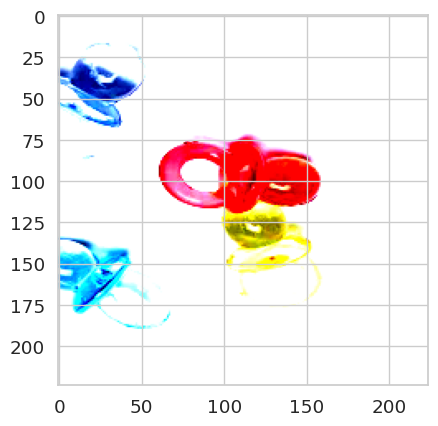

In [ ]:
plt.imshow(b['image'][14].permute(1, 2, 0))

## Efficientnet_b1

In [ ]:
model = torchvision.models.efficientnet_b1(pretrained=True)
model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B1_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B1_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b1_rwightman-533bc792.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b1_rwightman-533bc792.pth
100%|██████████| 30.1M/30.1M [00:00<00:00, 86.5MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)

In [ ]:
class Image_model(nn.Module):
    def __init__(self, n_class):
        super().__init__()
        self.base = torchvision.models.efficientnet_b1(pretrained=True)

        for param in self.base.parameters():
            param.requires_grad = False         

        self.base.classifier = nn.Sequential(
            nn.Dropout(.4),
            nn.Linear(in_features=1280, out_features=n_class)
            )

    def forward(self, image):
        x = self.base(image)
        return x

In [ ]:
epochs = 3

model = Image_model(n_class=n_class)
model.to(device)

optimizer = torch.optim.Adam(params=model.parameters(), 
    lr=0.002, 
    weight_decay=1e-4
)

criterion = nn.CrossEntropyLoss()
scheduler = PolynomialLR(optimizer, 
                         total_iters=len(loaders['train']) * epochs,
                         power=2) 

In [ ]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name)  

base.classifier.1.weight
base.classifier.1.bias


In [ ]:
%%time
history = trainval(model=model, 
                   loaders=loaders, 
                   optimizer=optimizer, 
                   loss_func=criterion, 
                   metric_func=f1_score_weighted,
                   epochs=epochs,
                   scheduler=scheduler,
                   device=device)

  0%|          | 0/570 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

[train] Epoch: 1/5 Loss: 3.7082 Score: 0.2919 


  0%|          | 0/143 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

[val] Epoch: 1/5 Loss: 2.8216 Score: 0.4186 
LR: 0.001280000


  0%|          | 0/570 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

[train] Epoch: 2/5 Loss: 2.7261 Score: 0.4123 


  0%|          | 0/143 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

[val] Epoch: 2/5 Loss: 2.6372 Score: 0.4470 
LR: 0.000720000


  0%|          | 0/570 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

[train] Epoch: 3/5 Loss: 2.4825 Score: 0.4479 


  0%|          | 0/143 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

[val] Epoch: 3/5 Loss: 2.5568 Score: 0.4564 
LR: 0.000320000


  0%|          | 0/570 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

[train] Epoch: 4/5 Loss: 2.3674 Score: 0.4666 


  0%|          | 0/143 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

[val] Epoch: 4/5 Loss: 2.5475 Score: 0.4583 
LR: 0.000080000


  0%|          | 0/570 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

[train] Epoch: 5/5 Loss: 2.3183 Score: 0.4741 


  0%|          | 0/143 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

[val] Epoch: 5/5 Loss: 2.5510 Score: 0.4595 
LR: 0.000000000
CPU times: user 10min 12s, sys: 1min 33s, total: 11min 46s
Wall time: 39min 25s


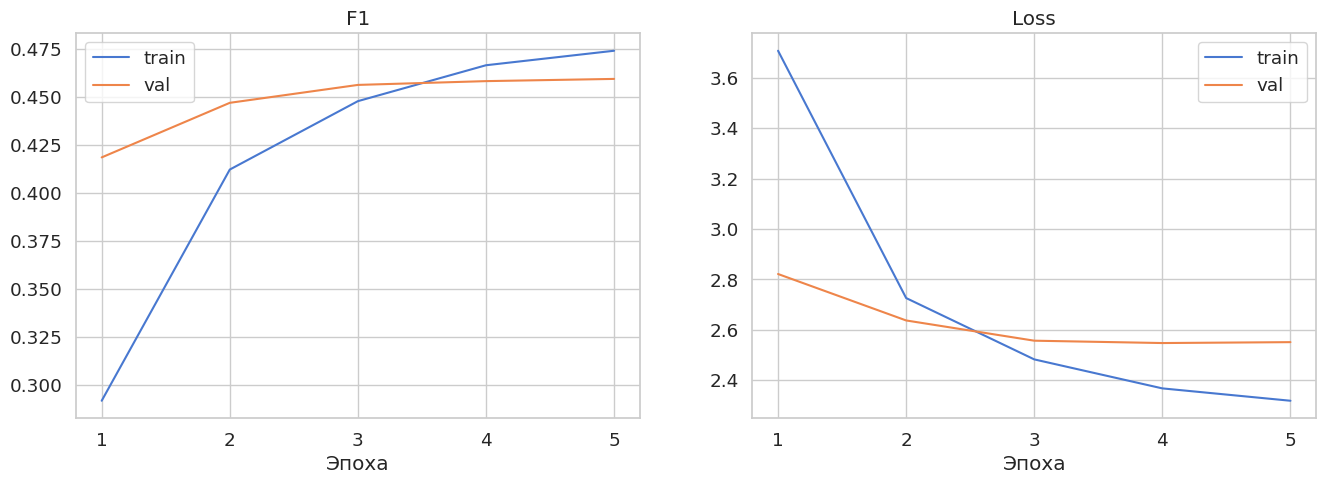

In [ ]:
plot_history(history)

In [ ]:
results = add_model(path_scores, 
                    "Efficientnet-Img", 
                    history['f1_train'][-1], 
                    history['f1_val'][-1])
results 

,Model,f1_train,f1_val
0,Baseline,0.782432,0.697255
1,MLP-Text,0.943761,0.846599
2,CNN-Text,0.941109,0.856393
3,LSTM-Text,0.871524,0.866506
4,BERT-Text,0.899672,0.874571
5,Efficientnet-Img,0.474145,0.459481


## CLIP
+ [Mastering the Huggingface CLIP Model: How to Extract Embeddings and Calculate Similarity for Text and Images](https://codeandlife.com/2023/01/26/mastering-the-huggingface-clip-model-how-to-extract-embeddings-and-calculate-similarity-for-text-and-images/)

In [ ]:
clip_name = "openai/clip-vit-base-patch32"

clip = CLIPModel.from_pretrained(clip_name)
processor = CLIPProcessor.from_pretrained(clip_name)

In [ ]:
class CLIPDataset(Dataset):
    def __init__(self, label, img_dir, product_id, processor):
        self.label = label
        self.img_path = product_id.apply(lambda x: img_dir + str(x) + '.jpg')
        self.processor = processor
        # self.images = [processor(images=Image.open(image), return_tensors="pt") 
        #                for image in tqdm(self.img_path)]
        
    def __len__(self):
        return len(self.label)
    
    def __getitem__(self, idx):
        image = Image.open(self.img_path.iloc[idx])
        inputs = self.processor(images=image, return_tensors="pt")
        label = self.label[idx]
        # inputs = self.images[idx]
        
        return {"pixel_values": inputs['pixel_values'].squeeze(), 
                "target": label}

In [ ]:
batch_size = 128
img_dir = "/content/images/train/"

train_dataset = CLIPDataset(label=y_train, 
                            img_dir=img_dir, 
                            product_id=df_train['product_id'], 
                            processor=processor
                            )

val_dataset = CLIPDataset(label=y_val, 
                          img_dir=img_dir, 
                          product_id=df_val['product_id'], 
                          processor=processor
                          )



loaders = {"train": DataLoader(train_dataset, batch_size=batch_size, shuffle=True, 
                               num_workers=2, pin_memory=True), 
           "val": DataLoader(val_dataset, batch_size=batch_size, shuffle=False, 
                             num_workers=2, pin_memory=True)
           }

In [ ]:
b = next(iter(loaders['train']))
b['pixel_values'].shape

torch.Size([128, 3, 224, 224])

In [ ]:
class CLIP_classifier(nn.Module):
    def __init__(self, n_class, clip, clip_dim):
        super().__init__()
        self.clip = clip
        
        for param in self.clip.parameters():
            param.requires_grad = False 

        self.classifier = nn.Linear(clip_dim, n_class)

    def forward(self, pixel_values):
        image_features = self.clip.get_image_features(pixel_values=pixel_values)
        x = self.classifier(image_features)
        return x

In [ ]:
epochs = 3

clip_model = CLIP_classifier(n_class=n_class, 
                        clip=clip, 
                        clip_dim=512)
clip_model.to(device)

optimizer = torch.optim.Adam(params=clip_model.parameters(), 
    lr=0.002, 
    weight_decay=1e-4
)

criterion = nn.CrossEntropyLoss()
scheduler = PolynomialLR(optimizer, 
                         total_iters=len(loaders['train']) * epochs,
                         power=2) 

In [ ]:
for name, param in clip_model.named_parameters():
    if param.requires_grad:
        print(name)  

classifier.weight
classifier.bias


In [ ]:
%%time
history = trainval(model=clip_model, 
                   loaders=loaders, 
                   optimizer=optimizer, 
                   loss_func=criterion, 
                   metric_func=f1_score_weighted,
                   epochs=epochs,
                   scheduler=scheduler,
                   device=device)

  0%|          | 0/570 [00:00<?, ?it/s]

[train] Epoch: 1/3 Loss: 2.9713 Score: 0.3914 


  0%|          | 0/143 [00:00<?, ?it/s]

[val] Epoch: 1/3 Loss: 2.1966 Score: 0.4985 
LR: 0.000888889


  0%|          | 0/570 [00:00<?, ?it/s]

[train] Epoch: 2/3 Loss: 1.9544 Score: 0.5438 


  0%|          | 0/143 [00:00<?, ?it/s]

[val] Epoch: 2/3 Loss: 2.0094 Score: 0.5312 
LR: 0.000222222


  0%|          | 0/570 [00:00<?, ?it/s]

[train] Epoch: 3/3 Loss: 1.8120 Score: 0.5729 


  0%|          | 0/143 [00:00<?, ?it/s]

[val] Epoch: 3/3 Loss: 1.9899 Score: 0.5344 
LR: 0.000000000
CPU times: user 9min 21s, sys: 52.7 s, total: 10min 14s
Wall time: 47min 32s


In [ ]:
torch.save(clip_model.state_dict(), 'model-clip.ann')

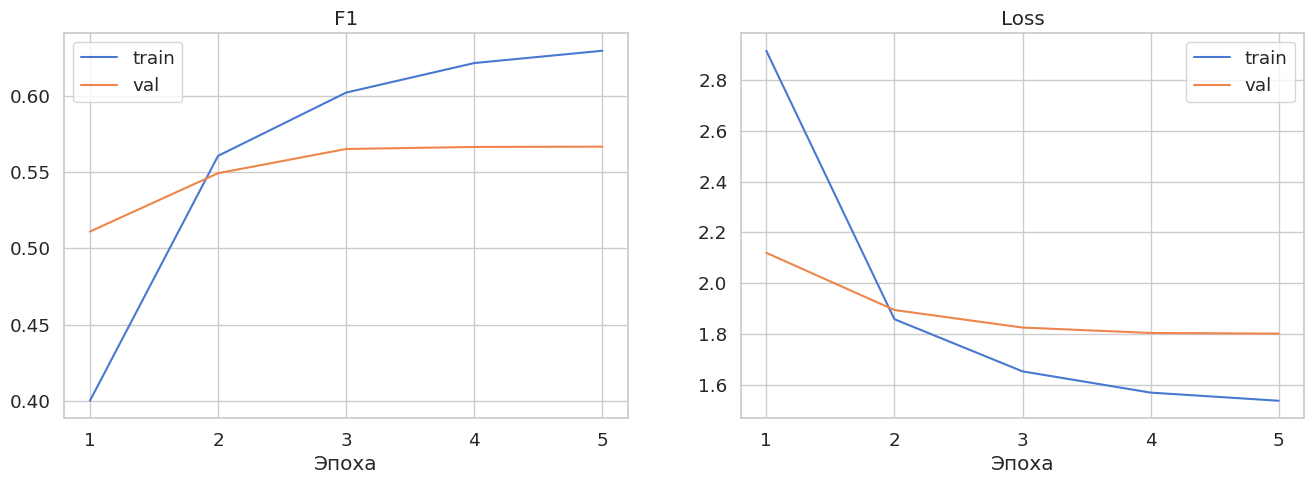

In [ ]:
plot_history(history)

In [ ]:
results = add_model(path_scores, 
                    "CLIP-Img", 
                    history['f1_train'][-1], 
                    history['f1_val'][-1])
results 

,Model,f1_train,f1_val
0,Baseline,0.782432,0.697255
1,MLP-Text,0.943761,0.846599
2,CNN-Text,0.941109,0.856393
3,LSTM-Text,0.871524,0.866506
4,BERT-Text,0.899672,0.874571
5,Efficientnet-Img,0.474145,0.459481
6,CLIP-Img,0.629365,0.566572


In [ ]:
gc.collect()

455800

# Нейросеть. Картинки + текст

## Датасет

In [ ]:
class IMG_TEXT_Dataset(Dataset):
    def __init__(self, df, img_dir, corpus, tokenizer, processor, transform=None):
        self.targets = df['class'].values
        self.img_path = df['product_id'].apply(lambda x: img_dir + str(x) + '.jpg')
        self.transform = transform
        self.texts = [tokenizer(text, 
                                padding='max_length', 
                                truncation=True,
                                max_length=300, 
                                return_tensors='pt',
                                return_token_type_ids=False
                               ) 
                      for text in tqdm(corpus)]
        self.processor = processor
        
    def __len__(self):
        return len(self.targets)
    
    def __getitem__(self, idx):
        # image = read_image(self.img_path.iloc[idx])  # тензор
        target = self.targets[idx]
        txt = self.texts[idx]

        img = Image.open(self.img_path.iloc[idx])
        inputs = self.processor(images=img, return_tensors="pt")
        image = inputs['pixel_values'].squeeze()
        
        if self.transform:
            image = self.transform(image)

        return {"image": image, 
                "input_ids": txt["input_ids"].squeeze(),
                "attention_mask": txt["attention_mask"].squeeze(),
                "target": target}

In [ ]:
batch_size = 128

train_dataset = IMG_TEXT_Dataset(df=df_train, 
                                 img_dir=img_dir, 
                                 corpus=corpus_train,
                                 tokenizer=bert_tokenizer,
                                 transform=transform_imgs["train"],
                                 processor=processor
                                )

val_dataset = IMG_TEXT_Dataset(df=df_val, 
                               img_dir=img_dir, 
                               corpus=corpus_val,
                               tokenizer=bert_tokenizer,
                               transform=transform_imgs["val"],
                               processor=processor
                              )

loaders = {"train": DataLoader(train_dataset, batch_size=batch_size, shuffle=True, 
                               num_workers=2, pin_memory=True
                              ), 
           "val": DataLoader(val_dataset, batch_size=batch_size, shuffle=False, 
                             num_workers=2, pin_memory=True
                            )
           }

  0%|          | 0/72899 [00:00<?, ?it/s]

  0%|          | 0/18225 [00:00<?, ?it/s]

In [ ]:
b = next(iter(loaders['train']))
b['image'].shape

## Модель
+ [nn.Identity()](https://stackoverflow.com/questions/64229717/what-is-the-idea-behind-using-nn-identity-for-residual-learning)

In [ ]:
class ImageEncoder(nn.Module):
    def __init__(self, model):
        super().__init__()
        self.encoder = model
        self.encoder.classifier = nn.Identity()

        for param in self.encoder.parameters():
            param.requires_grad = False

    def forward(self, image):
        # return self.encoder(pixel_values=image)
        return self.encoder.get_image_features(pixel_values=image)


class TextEncoder(nn.Module):
    def __init__(self, model):
        super().__init__()
        self.encoder = model

        for param in self.encoder.parameters():
            param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        x = self.encoder(input_ids=input_ids, 
                         attention_mask=attention_mask)
        return x.last_hidden_state[:, 0, :]   


class Projection(nn.Module):
    def __init__(self, feature_dim, projection_dim):
        super().__init__()  
        self.projection = nn.Linear(feature_dim, projection_dim)
        self.fc = nn.Linear(projection_dim, projection_dim)
        self.dropout = nn.Dropout(.3)
        self.layer_norm = nn.LayerNorm(projection_dim)

    def forward(self, x):
        p = self.projection(x)
        x = F.gelu(p)
        x = self.fc(x)
        x = self.dropout(x)
        # x = x + p  # skip connection
        x = self.layer_norm(x)
        return x 


class FusionModel(nn.Module):
    def __init__(self, hidden_dim, n_class,
                 model_text, model_image, projection_dim, 
                 text_embedding_dim, image_embedding_dim):
        super().__init__()  
        self.text_encoder = TextEncoder(model_text)
        self.image_encoder = ImageEncoder(model_image)

        self.text_projection = Projection(text_embedding_dim, projection_dim)
        self.image_projection = Projection(image_embedding_dim, projection_dim)

        self.fc = nn.Linear(2 * projection_dim, hidden_dim) 
        self.classifier = nn.Linear(hidden_dim, n_class) 
        self.dropout = nn.Dropout(.4)

    def forward(self, image, input_ids, attention_mask):
        txt_embedding = self.text_encoder(input_ids=input_ids, 
                                          attention_mask=attention_mask)
        img_embedding = self.image_encoder(image)

        txt = self.text_projection(txt_embedding)
        img = self.image_projection(img_embedding)

        x = torch.cat((txt, img), dim=1) 
        x = self.dropout(x)
        x = F.gelu(self.fc(x)) 
        # x = self.dropout(x)
        x = self.classifier(x)
        return x            

In [ ]:
bert_name = "cointegrated/rubert-tiny2"

# model_text = BertModel.from_pretrained(bert_name)
model_text = bert_model.bert
# model_image = torchvision.models.efficientnet_b1(pretrained=True)
model_image = clip_model.clip

model = FusionModel(hidden_dim=1024, 
                    model_text=model_text,
                    model_image=model_image, 
                    projection_dim=1024, 
                    text_embedding_dim=312, 
                    image_embedding_dim=512,
                    n_class=n_class)
model.to(device);

In [ ]:
epochs=5

criterion = nn.CrossEntropyLoss()


optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

scheduler = get_linear_schedule_with_warmup(
                optimizer,
                num_warmup_steps=50,
                num_training_steps=len(loaders['train']) * epochs
)

In [ ]:
%%time

history = trainval(model=model, 
                   loaders=loaders, 
                   optimizer=optimizer, 
                   loss_func=criterion, 
                   metric_func=f1_score_weighted,
                   epochs=epochs,
                   scheduler=scheduler,
                   device=device)

  0%|          | 0/570 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

[train] Epoch: 1/5 Loss: 1.2529 Score: 0.7299 


  0%|          | 0/143 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

[val] Epoch: 1/5 Loss: 0.6947 Score: 0.8351 
LR: 0.000814286


  0%|          | 0/570 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

[train] Epoch: 2/5 Loss: 0.5146 Score: 0.8547 


  0%|          | 0/143 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

[val] Epoch: 2/5 Loss: 0.5878 Score: 0.8633 
LR: 0.000610714


  0%|          | 0/570 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

[train] Epoch: 3/5 Loss: 0.3969 Score: 0.8819 


  0%|          | 0/143 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

[val] Epoch: 3/5 Loss: 0.5608 Score: 0.8724 
LR: 0.000407143


  0%|          | 0/570 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

[train] Epoch: 4/5 Loss: 0.3093 Score: 0.9021 


  0%|          | 0/143 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

[val] Epoch: 4/5 Loss: 0.5294 Score: 0.8811 
LR: 0.000203571


  0%|          | 0/570 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

[train] Epoch: 5/5 Loss: 0.2395 Score: 0.9209 


  0%|          | 0/143 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across th

[val] Epoch: 5/5 Loss: 0.5362 Score: 0.8842 
LR: 0.000000000
CPU times: user 21min 1s, sys: 1min 34s, total: 22min 35s
Wall time: 1h 40min 41s


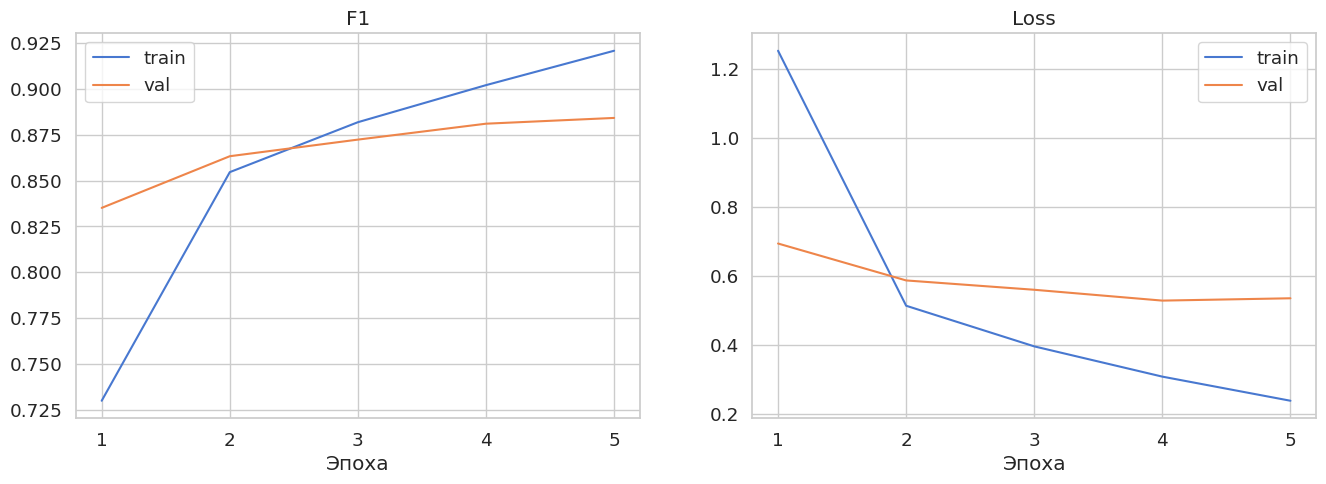

In [ ]:
plot_history(history)

In [ ]:
results = add_model(path_scores, 
                    "Fusion-Txt-Img", 
                    history['f1_train'][-1], 
                    history['f1_val'][-1])
results 

,Model,f1_train,f1_val
0,Baseline,0.782432,0.697255
1,Fusion-Txt-Img,0.920902,0.884244


# Эксперименты. Shop_id embedding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
shop_encoder = OrdinalEncoder(dtype='int',
                              handle_unknown='use_encoded_value', 
                              unknown_value=-1)
df_train["shop_class"] = shop_encoder.fit_transform(df_train[["shop_id"]])
df_train["shop_class"] = df_train["shop_class"] + 1

df_val["shop_class"] = shop_encoder.transform(df_val[["shop_id"]])
df_val["shop_class"] = df_val["shop_class"] + 1

In [ ]:
class Text_Shop_Dataset(Dataset):
    def __init__(self, texts, targets, shops, length=None):
        """
        length - кол-во токенов (для LSTM)
        """
        self.targets = targets
        self.texts = texts
        self.length = length
        self.shops = shops

    def __len__(self):
        return len(self.targets)
    
    def __getitem__(self, idx):  
        batch = {'text': self.texts[idx],
                 'target': self.targets[idx],
                 'shop': self.shops[idx]}
        if self.length is not None:
            batch['length'] = self.length[idx]
        return batch

In [ ]:
batch_size = 64

train_dataset = Text_Shop_Dataset(texts=torch.from_numpy(text_vectors_train), 
                                  targets=torch.from_numpy(y_train),
                                  shops=torch.from_numpy(df_train['shop_class'].values))
val_dataset = Text_Shop_Dataset(texts=torch.from_numpy(text_vectors_val), 
                                targets=torch.from_numpy(y_val), 
                                shops=torch.from_numpy(df_val['shop_class'].values))

loaders = {"train": DataLoader(train_dataset, batch_size=batch_size, shuffle=True, 
                               num_workers=2, pin_memory=True), 
           "val": DataLoader(val_dataset, batch_size=batch_size, shuffle=False, 
                             num_workers=2, pin_memory=True)
           }

In [ ]:
class ShopEncoder(nn.Module):
    def __init__(self, shop_size, shop_dim):
        super().__init__()
        self.emb = nn.Embedding(shop_size, shop_dim, padding_idx=None)
        nn.init.kaiming_uniform_(self.emb.weight, nonlinearity='relu')
        self.linear = nn.Linear(shop_dim, n_class)
        self.dropout = nn.Dropout(0.4)

    def forward(self, shop):
        x = self.emb(shop)
        x = self.dropout(x)
        x = F.gelu(self.linear(x))
        return x


class ShopModel(nn.Module):
    def __init__(self, shop_size, shop_dim, text_model, n_class):
        super().__init__()
        self.text_model = text_model
        self.shop_encoder = ShopEncoder(shop_size, shop_dim)
        self.fc = nn.Linear(in_features=2*n_class, out_features=n_class)
        # self.fc = nn.Linear(in_features=shop_dim+n_class, out_features=n_class)
        # self.classifier = nn.Linear(n_class, n_class)
        self.dropout = nn.Dropout(0.4)

    def forward(self, text, shop):
        text = self.text_model(text)
        shop = self.shop_encoder(shop)

        x = torch.cat((text, shop), dim=1)
        x = self.dropout(x)
        x = self.fc(x)
        # x = F.gelu(self.fc(x))
        # x = self.classifier(x)
        return x   

class MLP_text_shop(torch.nn.Module) :
    def __init__(self, vocab_size, embedding_dim, n_class, text_size, hidden_dim, 
                 shop_size, shop_dim):
        super().__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.emb_shop = nn.Embedding(shop_size, shop_dim, padding_idx=None)
        nn.init.kaiming_uniform_(self.embeddings.weight, nonlinearity='relu')
        nn.init.kaiming_uniform_(self.emb_shop.weight, nonlinearity='relu')
        
        self.fc1 = nn.Linear(in_features=(embedding_dim * text_size + shop_dim), out_features=hidden_dim)
        self.fc2 = nn.Linear(in_features=hidden_dim, out_features=hidden_dim)
        self.fc3 = nn.Linear(in_features=hidden_dim, out_features=n_class)
        self.dropout = nn.Dropout(0.3)
        
    def forward(self, text, shop):
        text = self.embeddings(text)
        text = text.view(text.shape[0], -1)
        shop = self.emb_shop(shop)

        x = torch.cat((text, shop), dim=1)
        x = self.dropout(x)
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

In [ ]:
SHOP_SIZE = df_train['shop_class'].nunique() + 1
SHOP_DIM = 100
EMBEDDING_DIM = 200
hidden_dim = 512
lr = 0.002
epochs = 5

# text_model = MLP_text(vocab_size=len(tp.word2idx),
#                       embedding_dim=EMBEDDING_DIM, 
#                       n_class=n_class,
#                       text_size=TEXT_SIZE,
#                       hidden_dim=hidden_dim
#                      )

# model = ShopModel(shop_size=SHOP_SIZE, 
#                   shop_dim=SHOP_DIM, 
#                   text_model=text_model, 
#                   n_class=n_class)

model = MLP_text_shop(shop_size=SHOP_SIZE, 
                      shop_dim=SHOP_DIM, 
                      vocab_size=len(tp.word2idx),
                      embedding_dim=EMBEDDING_DIM, 
                      n_class=n_class,
                      text_size=TEXT_SIZE,
                      hidden_dim=hidden_dim)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), 
                             lr=lr,
                             weight_decay=1e-4)

scheduler = get_linear_schedule_with_warmup(
                optimizer,
                num_warmup_steps=50,
                num_training_steps=len(loaders['train']) * epochs
)


params_count(model)

Тренеруемых параметров: 29,267,130


In [ ]:
%%time

history = trainval(model=model, 
                   loaders=loaders, 
                   optimizer=optimizer, 
                   loss_func=criterion, 
                   metric_func=f1_score_weighted,
                   epochs=epochs,
                   scheduler=scheduler,
                   device=device)

  0%|          | 0/1140 [00:00<?, ?it/s]

[train] Epoch: 1/5 Loss: 2.7401 Score: 0.4618 


  0%|          | 0/285 [00:00<?, ?it/s]

[val] Epoch: 1/5 Loss: 1.1942 Score: 0.7220 
LR: 0.001614159


  0%|          | 0/1140 [00:00<?, ?it/s]

[train] Epoch: 2/5 Loss: 0.9991 Score: 0.7553 


  0%|          | 0/285 [00:00<?, ?it/s]

[val] Epoch: 2/5 Loss: 0.8181 Score: 0.8009 
LR: 0.001210619


  0%|          | 0/1140 [00:00<?, ?it/s]

[train] Epoch: 3/5 Loss: 0.5375 Score: 0.8536 


  0%|          | 0/285 [00:00<?, ?it/s]

[val] Epoch: 3/5 Loss: 0.7425 Score: 0.8287 
LR: 0.000807080


  0%|          | 0/1140 [00:00<?, ?it/s]

[train] Epoch: 4/5 Loss: 0.3234 Score: 0.9088 


  0%|          | 0/285 [00:00<?, ?it/s]

[val] Epoch: 4/5 Loss: 0.7013 Score: 0.8406 
LR: 0.000403540


  0%|          | 0/1140 [00:00<?, ?it/s]

[train] Epoch: 5/5 Loss: 0.1967 Score: 0.9444 


  0%|          | 0/285 [00:00<?, ?it/s]

[val] Epoch: 5/5 Loss: 0.6906 Score: 0.8468 
LR: 0.000000000
CPU times: user 1min 33s, sys: 5.55 s, total: 1min 39s
Wall time: 1min 51s


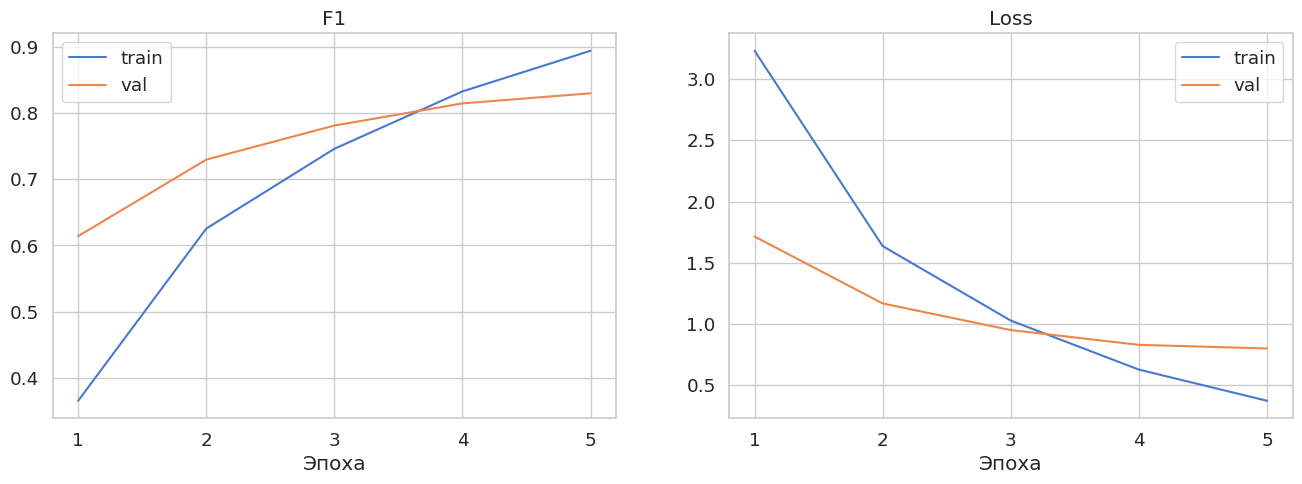

In [ ]:
[plot_history(history)

# Заметки

+ AdamW ухудшил результаты MLP, CNN, LSTM
+ лемматизация ухудшила BERT
+ у BERT, без фильтрации токенов, лучше результат